In [1]:
from diags import Conventional
import numpy as np
import pandas as pd
from filter_df import filter_df
from da_plots import base_plots, wind_base_plots

In [2]:
pd.set_option('display.max_columns', None) # so I can see all columns on the df

# Filter dataframe returned by PyGSI

## Read diag files

In [3]:
#temperature diag files
diag_t_ges_fp = '../example_data/diag_conv_t_ges.2024031812.nc4'
diag_t_anl_fp = '../example_data/diag_conv_t_anl.2024031812.nc4'

#wind diag files
diag_uv_ges_fp = '../example_data/diag_conv_uv_ges.2024031812.nc4'
diag_uv_anl_fp = '../example_data/diag_conv_uv_anl.2024031812.nc4'

In [4]:
#Temperature Diag file
diag_ges = Conventional(diag_t_ges_fp)
diag_anl = Conventional(diag_t_anl_fp)

#Wind Diag file
# diag_ges = Conventional(diag_uv_ges_fp)
# diag_anl = Conventional(diag_uv_anl_fp)

## Query data

In [5]:
df_ges = diag_ges.get_data()
df_anl = diag_anl.get_data()

In [6]:
df_anl.head()

,station_id,observation_class,observation_type,observation_subtype,latitude,longitude,station_elevation,pressure,height,time,prep_qc_mark,setup_qc_mark,prep_use_flag,analysis_use_flag,nonlinear_qc_rel_wgt,errinv_input,errinv_adjust,errinv_final,observation,omf_adjusted,omf_unadjusted,data_pof,data_vertical_velocity,dominant_sfc_type,model_terrain,hofx_unadjusted,hofx_adjusted
0,NLOYR3BA,t,133,0,3.0830,202.462006,10668.0,238.399994,10668.0,-0.47944,1.0,1.0,0.0,1.0,4.0,1.130850,1.130850,1.130850,232.149994,0.727931,0.727931,-9.990000e+09,-9.990000e+09,0.0,0.0,231.422058,231.422058
1,PPSAPQJA,t,133,0,7.0120,199.987000,11582.0,206.500000,11582.0,-0.08167,1.0,1.0,0.0,1.0,4.0,1.081445,1.081445,1.081445,225.149994,1.301493,1.301493,-9.990000e+09,-9.990000e+09,0.0,0.0,223.848495,223.848495
2,EH5SSIJA,t,133,0,11.7150,198.373001,11582.0,206.500000,11582.0,-0.56222,1.0,1.0,0.0,1.0,4.0,1.081445,1.081445,1.081445,226.149994,1.928921,1.928921,-9.990000e+09,-9.990000e+09,0.0,0.0,224.221069,224.221069
3,AU0332,t,131,0,9.4152,197.984207,11200.0,219.300003,11200.0,-0.91417,1.0,1.0,0.0,1.0,4.0,1.091483,1.091483,1.091483,227.149994,0.248300,0.248300,-9.990000e+09,-9.990000e+09,0.0,0.0,226.901688,226.901688
4,AU0332,t,131,0,8.7919,197.248703,11500.0,209.199997,11500.0,-0.78972,1.0,1.0,0.0,1.0,4.0,1.068424,1.068424,1.068424,224.649994,-0.248225,-0.248225,-9.990000e+09,-9.990000e+09,0.0,0.0,224.898224,224.898224


In [7]:
# for col in df_anl.columns:
#     # Check if all elements in the column are equal between _anl and _ges
#     if not (df_anl[col] == df_ges[col]).all():
#         print(f"Column '{col}' is different.")

## Testing PyGSI filter_obs function

### Set filter arguments

In [8]:
elv_range = (0,20)
p_range = (500,1000)
err_range = (0, 4)

# Lat and lon ranges for colorado
co_lats = (37, 41)
co_lons = (360-109, 360-102) #to convert from deg west to deg east

In [9]:
# wind examples
# df_anl_fil = filter_df(df_anl, obs_types= [287], hem='CONUS')
# df_ges_fil = filter_df(df_ges, obs_types= [287], hem='CONUS')
# df_anl_fil = filter_df(df_anl, obs_types= [287], lat_range=co_lats, lon_range=co_lons)
# df_ges_fil = filter_df(df_ges, obs_types= [287], lat_range=co_lats, lon_range=co_lons)

# temp examples
# df_anl_fil = filter_df(df_anl, obs_types= [187], hem='CONUS')
# df_ges_fil = filter_df(df_ges, obs_types= [187], hem='CONUS')
df_anl_fil = filter_df(df_anl, obs_types= [187], lat_range=co_lats, lon_range=co_lons)
df_ges_fil = filter_df(df_ges, obs_types= [187], lat_range=co_lats, lon_range=co_lons)
print(len(df_anl_fil))
print(len(df_ges_fil))

89
89


## Testing base plots

------------ Temperature Data Assimilation Statistics and Plots ------------
Observation Type: 187

Proportion Assimilated: 0.6629213690757751

Observation Statistics: 
n: 89, mean: 24.33432960510254, std: 5.707066535949707, max: 35.08567428588867, min: 10.701904296875

OmF Statistics: 
n: 89, mean: -0.5649860501289368, std: 3.7368974685668945, max: 13.60534381866455, min: -8.972201347351074

OmA Statistics: 
n: 89, mean: 0.43243998289108276, std: 2.197439670562744, max: 13.830554008483887, min: -3.3472158908843994



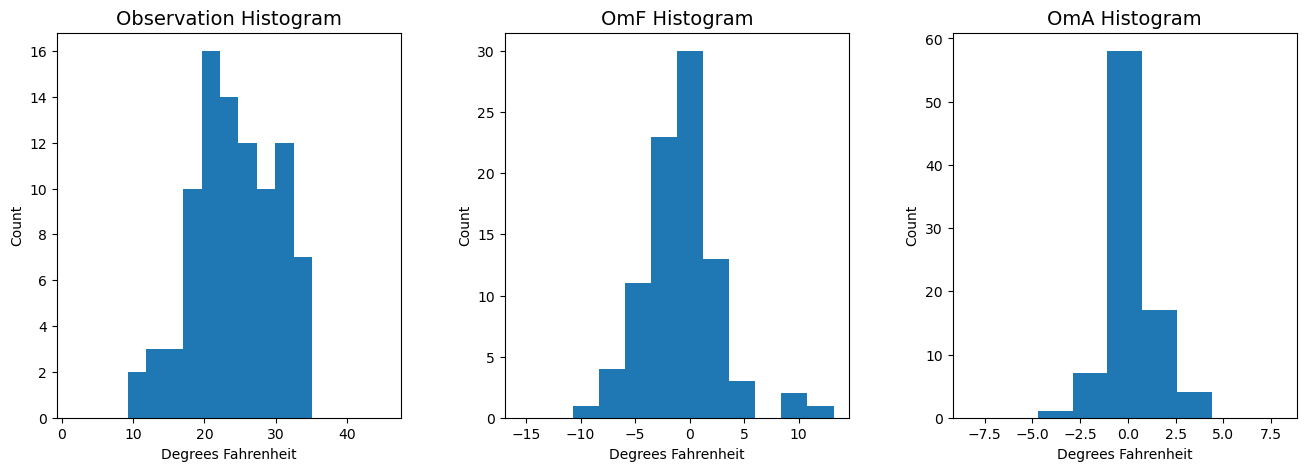

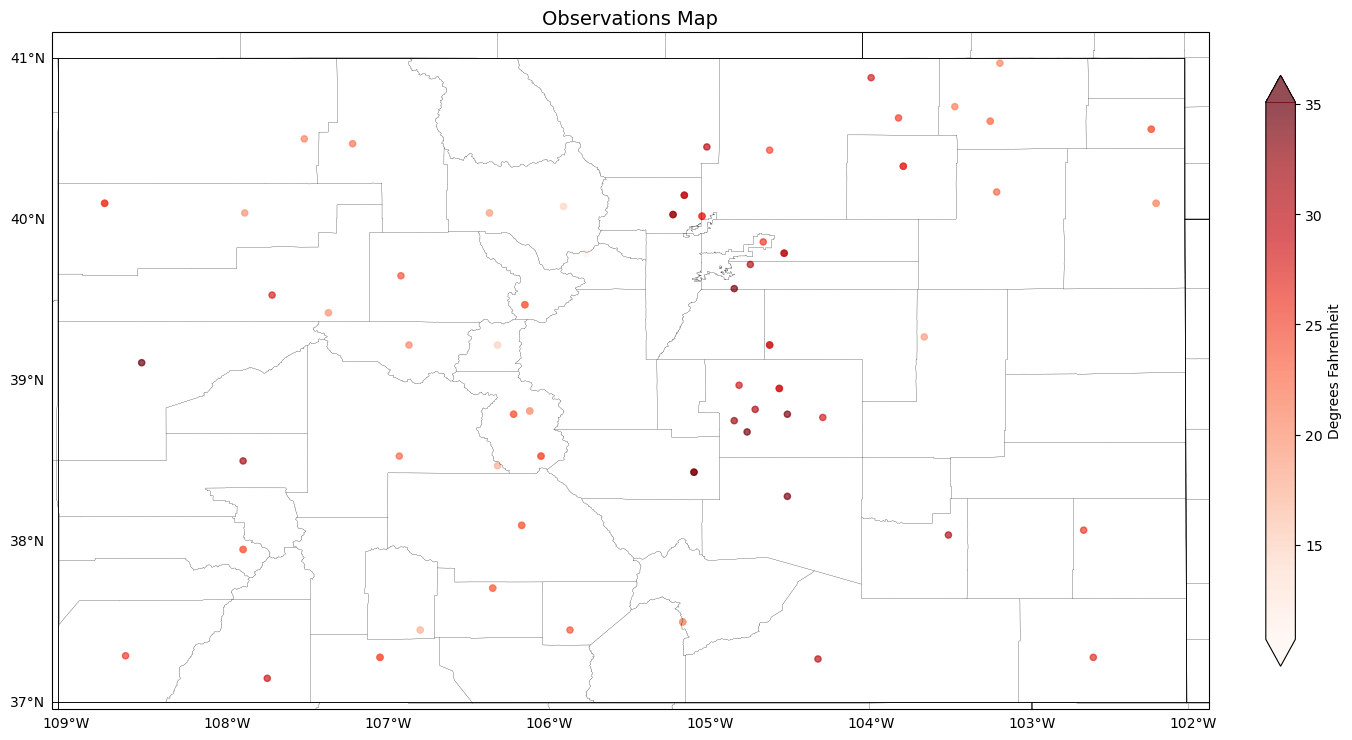

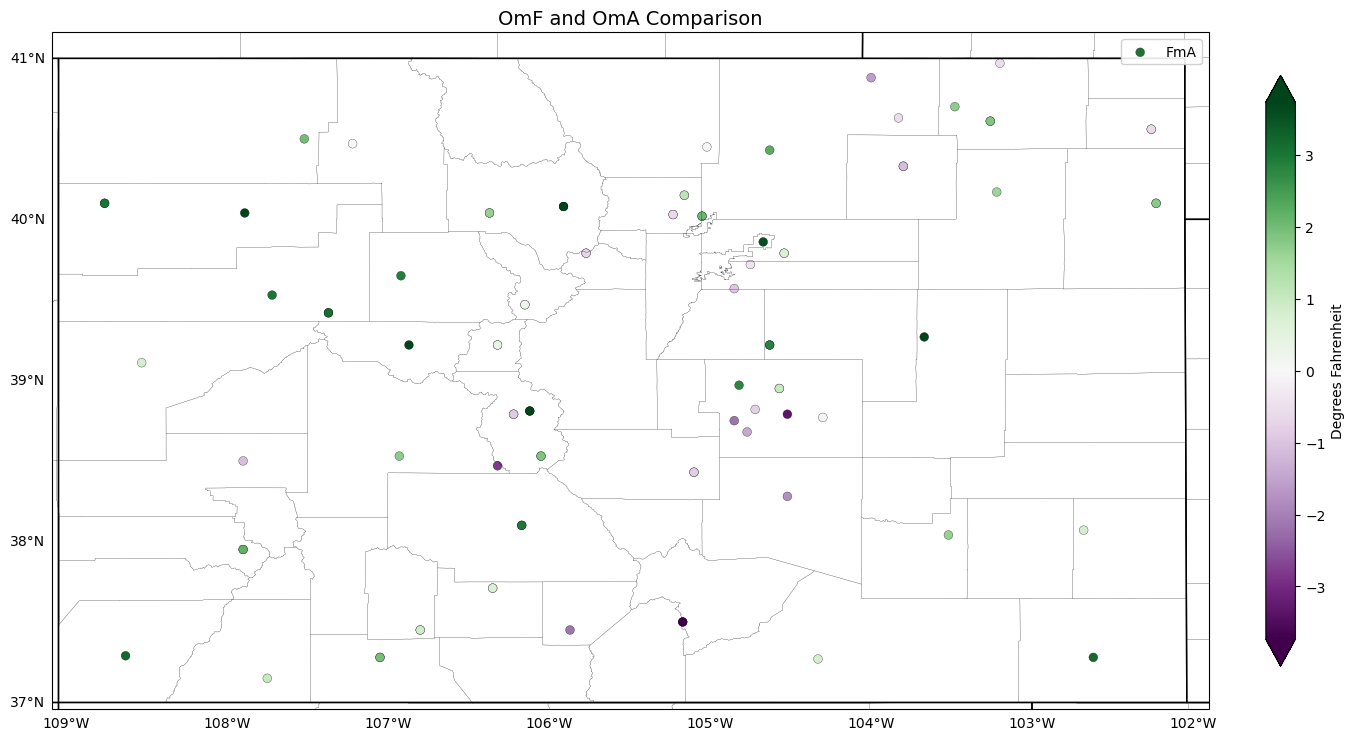

In [10]:
base_plots(df_anl_fil, df_ges_fil, diag_ges.metadata)
# wind_base_plots(df_anl_fil, df_ges_fil, diag_ges.metadata)